# Project 2 - Data Analytics Programming: Python Project

## Layoffs Data Analytics

#### Authors: Chunjingwen Cui, MING HAO(Howard) Lee

#### 2023-05-02

### A. Introduction of the dataset (HW5)

1. Our motivation for analyzing this dataset

- This layoffs dataset contains information on thousands of technology companies worldwide that have conducted layoffs since the COVID-19 pandemic began. Analyzing this dataset can help us discover the effects of the pandemic on the job market, gain a better understanding of employment trends in the tech industry, and provide valuable insights into the current and future state of the job market.

2. Link of the dataset

https://www.kaggle.com/datasets/swaptr/layoffs-2022

3. Observation

- Each observation represent one layoff event of a tech-company within the world.

4. Variables

- company: Name of the company
- location: Location of company headquarters
- industry: Industry of the company
- total_laid_off: Number of employees laid off
- percentage_laid_off: Percentage of employees laid off
- date: Date of layoff
- stage: Stage of funding
- country: Country
- funds_raised: Funds raised by the company (in Millions $)

#### * Data Analysis Preparation

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [2]:
# Loading dataset
layoffs = pd.read_csv("~/Desktop/layoffs.csv")
layoffs

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,CoverMyMeds,Columbus,Healthcare,800.0,NaN,2023-03-29,Acquired,United States,5.0
1,Electronic Arts,SF Bay Area,Consumer,780.0,0.06,2023-03-29,Post-IPO,United States,2.0
2,Shift,SF Bay Area,Transportation,NaN,0.30,2023-03-29,Post-IPO,United States,504.0
3,Lucid Motors,SF Bay Area,Transportation,1300.0,0.18,2023-03-28,Post-IPO,United States,8300.0
4,Blue Nile,Seattle,Retail,119.0,NaN,2023-03-28,Acquired,United States,62.0
...,...,...,...,...,...,...,...,...,...
2433,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2434,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2435,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
2436,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [3]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2438 non-null   object 
 1   location             2438 non-null   object 
 2   industry             2436 non-null   object 
 3   total_laid_off       1669 non-null   float64
 4   percentage_laid_off  1617 non-null   float64
 5   date                 2437 non-null   object 
 6   stage                2432 non-null   object 
 7   country              2438 non-null   object 
 8   funds_raised         2215 non-null   float64
dtypes: float64(3), object(6)
memory usage: 171.5+ KB


### B. Brainstorm of the dataset

1. Five questions (HW6)

- What is the industry distribution of layoff dataset within bay area?
- In which stage of the company had the greatest median of layoff percentage?
- Is there any relationship between funds_raised and layoff percentage? 
- How are the layoffs distributed by year in every country?
- Which are the top 3 locations where most layoffs happened year-wise?

2. Answer to question (1): What is the industry distribution of layoff dataset within bay area? (HW6)

In [4]:
Bay_layoffs = layoffs[layoffs["location"] == "SF Bay Area" ]
Bay_layoffs

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Electronic Arts,SF Bay Area,Consumer,780.0,0.06,2023-03-29,Post-IPO,United States,2.0
2,Shift,SF Bay Area,Transportation,NaN,0.30,2023-03-29,Post-IPO,United States,504.0
3,Lucid Motors,SF Bay Area,Transportation,1300.0,0.18,2023-03-28,Post-IPO,United States,8300.0
5,AEye,SF Bay Area,Transportation,46.0,0.33,2023-03-28,Post-IPO,United States,314.0
14,Glassdoor,SF Bay Area,HR,140.0,0.15,2023-03-22,Acquired,United States,204.0
...,...,...,...,...,...,...,...,...,...
2411,Triplebyte,SF Bay Area,Recruiting,15.0,0.17,2020-03-23,Series B,United States,48.0
2412,Ladder Life,SF Bay Area,Finance,13.0,0.25,2020-03-23,Series C,United States,94.0
2413,Cabin,SF Bay Area,Travel,NaN,0.20,2020-03-23,Seed,United States,3.0
2423,Ejento,SF Bay Area,Recruiting,84.0,1.00,2020-03-19,Unknown,United States,NaN


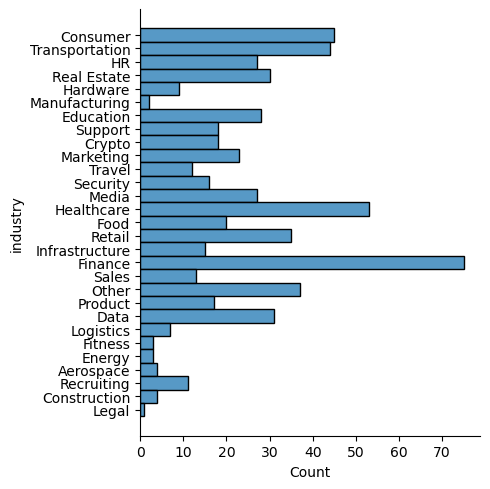

In [5]:
sns.displot(data = Bay_layoffs, y = "industry")
plt.show()

- Based on this chart, we can see that in the Bay Area tech-company layoffs dataset, the financial industry had the highest number of companies announcing layoffs, followed by the healthcare industry. The legal and manufacturing industries had the fewest number of companies announcing layoffs.

3. Answer to question (2): In which stage of the company had the greatest median of layoff percentage? (Additional requirement)

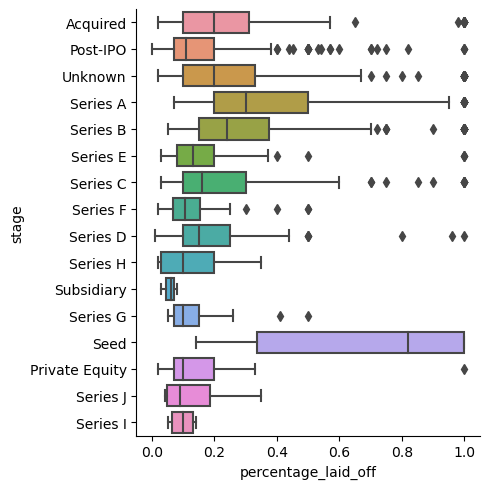

In [6]:
sns.catplot(data = layoffs, y = "stage", x = "percentage_laid_off", kind = "box")
plt.show()

- To answer this question, we create a boxplot to find the distribution of layoff percentage among each stage. From the graph, we can see that the median layoff percentage of seed stage is the greatest, over 80%. This answers our second question. In addition, we can also observe from the boxplots that Series A and Series B have the second and third highest median layoff percentages respectively, with both exceeding 20%.

#### * Data cleaning (HW6)  
Extra credit for all students: Check your dataset for columns with outliers that you may want to filter out. Note down any columns that you plan on filtering on,and the values that you will filter out.

In [7]:
# Removing NA data
layoffs_cleaned = layoffs.dropna(axis = 0, how = "any", inplace = False)
layoffs_cleaned

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1,Electronic Arts,SF Bay Area,Consumer,780.0,0.06,2023-03-29,Post-IPO,United States,2.0
3,Lucid Motors,SF Bay Area,Transportation,1300.0,0.18,2023-03-28,Post-IPO,United States,8300.0
5,AEye,SF Bay Area,Transportation,46.0,0.33,2023-03-28,Post-IPO,United States,314.0
11,Slite,Paris,Other,10.0,0.25,2023-03-23,Series A,France,15.0
12,Indeed,Austin,HR,2200.0,0.15,2023-03-22,Acquired,United States,5.0
...,...,...,...,...,...,...,...,...,...
2430,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
2431,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
2433,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
2434,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0


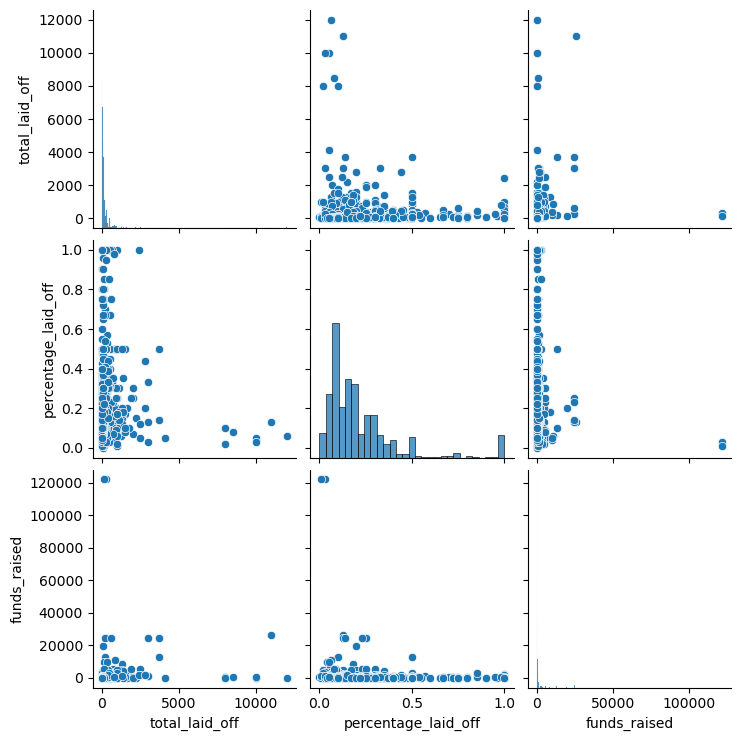

In [8]:
sns.pairplot(layoffs_cleaned)
plt.show()

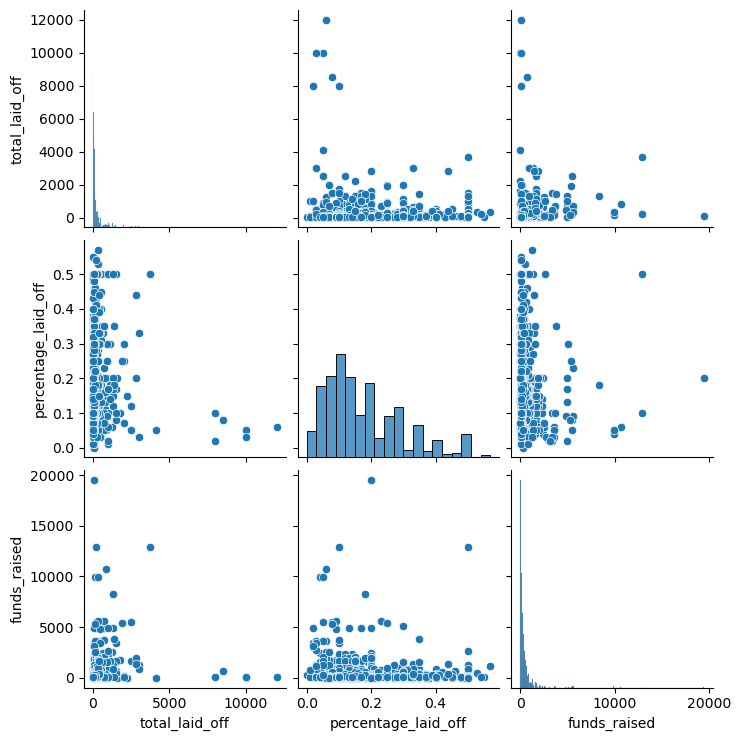

In [9]:
layoffs_filterOutlier = layoffs_cleaned[(layoffs_cleaned["funds_raised"] < 20000) & (layoffs_cleaned["percentage_laid_off"] < 0.6)]

sns.pairplot(layoffs_filterOutlier)
plt.show()

### C. Statistical test

1. Correlation (Additional requirement)

In [10]:
layoffs_cleaned.corr()

/var/folders/_h/n3mlqmm953gbr2wqdlbm1dqm0000gn/T/ipykernel_1500/1127252134.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  layoffs_cleaned.corr()


,total_laid_off,percentage_laid_off,funds_raised
total_laid_off,1.000000,-0.045507,0.108043
percentage_laid_off,-0.045507,1.000000,-0.066217
funds_raised,0.108043,-0.066217,1.000000


In [11]:
layoffs_cleaned.corr(method = "pearson")

/var/folders/_h/n3mlqmm953gbr2wqdlbm1dqm0000gn/T/ipykernel_1500/3628293738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  layoffs_cleaned.corr(method = "pearson")


,total_laid_off,percentage_laid_off,funds_raised
total_laid_off,1.000000,-0.045507,0.108043
percentage_laid_off,-0.045507,1.000000,-0.066217
funds_raised,0.108043,-0.066217,1.000000


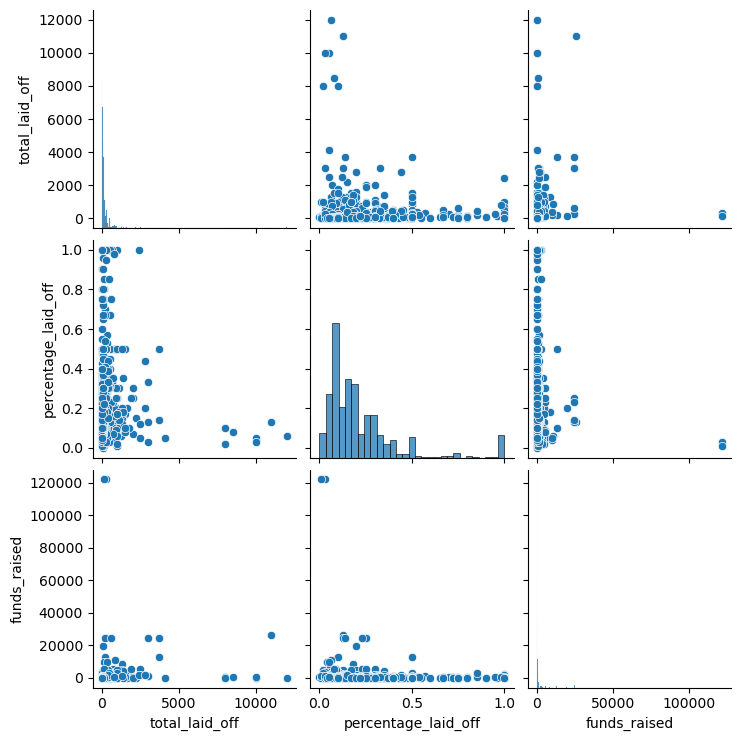

In [12]:
sns.pairplot(layoffs_cleaned)
plt.show()

/var/folders/_h/n3mlqmm953gbr2wqdlbm1dqm0000gn/T/ipykernel_1500/3964327904.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(layoffs_cleaned.corr(), annot = True)


<Axes: >

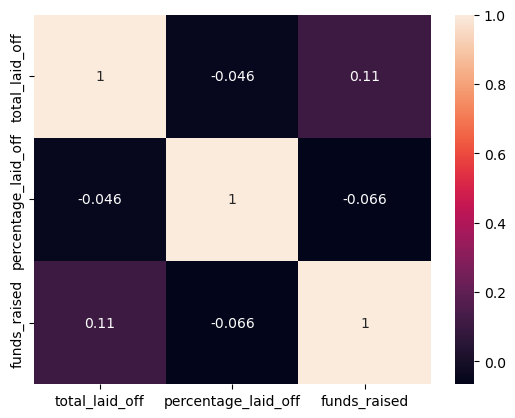

In [13]:
sns.heatmap(layoffs_cleaned.corr(), annot = True)

/var/folders/_h/n3mlqmm953gbr2wqdlbm1dqm0000gn/T/ipykernel_1500/893359840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(layoffs_cleaned.corr(method = "pearson"), annot = True)


<Axes: >

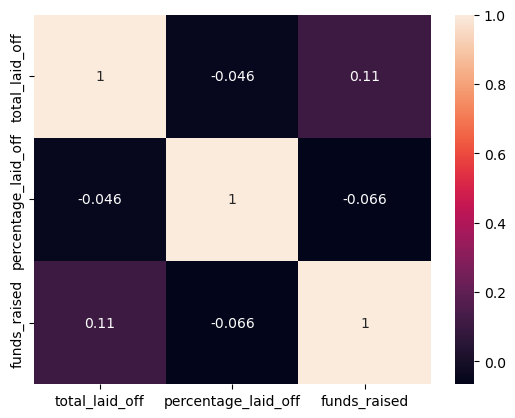

In [14]:
sns.heatmap(layoffs_cleaned.corr(method = "pearson"), annot = True)

- From the results and graphs, we can see that the correlation between each pair of the three quantitative variables is relatively weak. Specifically, the variable 'percentage_laid_off' shows a negative correlation with the other two variables, while 'funds_raised' and 'total_laid_off' exhibit a positive correlation.

2. T-test (HW7)

- H0: There is no difference in the mean layoff percentages between the two industries.

In [15]:
layoffs_travel = layoffs_cleaned[layoffs_cleaned["industry"] == "Travel" ]
layoffs_media = layoffs_cleaned[layoffs_cleaned["industry"] == "Media"]

In [16]:
stats.ttest_ind(layoffs_travel["percentage_laid_off"], layoffs_media["percentage_laid_off"])

Ttest_indResult(statistic=3.523623219148689, pvalue=0.0007986201793077338)

- The result of the t-test showed a p-value less than 0.05 (the significant level), which means we can reject the null hypothesis and conclude that there is a significant difference in the mean layoff percentages between the media and travel industries.sns.catplot(data = layoffs_tm, x = "industry", y = "percentage_laid_off", kind = "box")
plt.show()

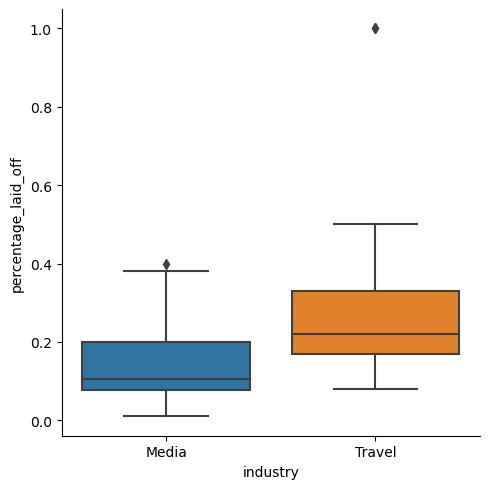

In [17]:
# Distribution of layoff percentages between the travel and media industries
layoffs_tm = layoffs_cleaned[(layoffs_cleaned["industry"] == "Travel") | (layoffs_cleaned["industry"] == "Media") ]
sns.catplot(data = layoffs_tm, x = "industry", y = "percentage_laid_off", kind = "box")
plt.show()

3. Linear regression (HW7)

- We focused on the data from the financial industry and try to find whether there is a linear relationship between the layoff percentage and raised funds.

In [18]:
layoffs_fi = layoffs_cleaned[layoffs_cleaned["industry"] == "Finance"]

In [19]:
stats.linregress(x = layoffs_fi["funds_raised"], y = layoffs_fi["percentage_laid_off"])

LinregressResult(slope=-3.317415674818196e-05, intercept=0.21695328744267076, rvalue=-0.17291233905310222, pvalue=0.02980980095257358, stderr=1.5129346029601225e-05, intercept_stderr=0.013467647909654051)

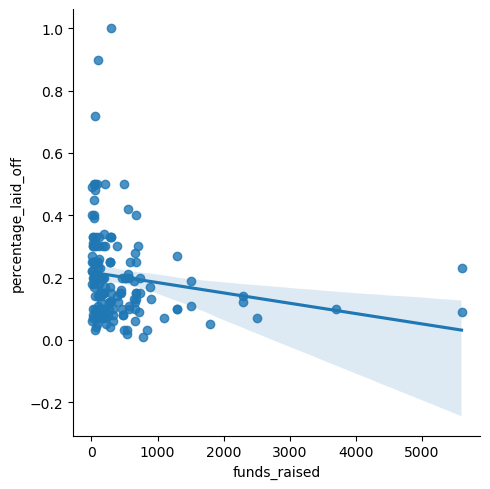

In [20]:
sns.lmplot(data = layoffs_fi, x="funds_raised", y = "percentage_laid_off")
plt.show()

- Based on the results of the linear regression analysis, we found that the p-value is less than 0.05, indicating that we can reject the null hypothesis of the linear regression model and conclude that there is a significant linear relationship between the two variables. Meanwhile, we observed that the r-value is -0.17. It means that there is a weak negative correlation between the layoff percentage and raised funds in the financial industry.

### D. Prediction (HW7) 

We plan to predict funds_raised based on other quantitative variables on the dataset of financial industry.

1. Split the data into a train and test set.

In [21]:
layoffs_fi.loc[:, ["funds_raised", "total_laid_off"]]

,funds_raised,total_laid_off
21,331.0,80.0
24,62.0,15.0
43,24.0,25.0
50,16.0,15.0
53,681.0,800.0
...,...,...
2307,50.0,17.0
2336,110.0,51.0
2361,201.0,78.0
2364,49.0,47.0


In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(layoffs_fi.loc[:, ["percentage_laid_off", "total_laid_off"]], layoffs_fi[["funds_raised"]], random_state=272)

In [23]:
X_train

,percentage_laid_off,total_laid_off
2105,0.09,38.0
220,1.00,83.0
1921,0.14,18.0
2336,0.30,51.0
757,0.04,15.0
...,...,...
457,0.21,104.0
2101,0.30,460.0
818,0.06,100.0
1872,0.49,22.0


2. Train a linear model using either LinearRegression(), Ridge(), or Lasso().

In [25]:
# Linear
layoffs_fi_linear = linear_model.LinearRegression().fit(X_train, y_train)

In [26]:
layoffs_fi_linear.coef_

array([[-1.09042534e+03,  6.41973940e-01]])

In [27]:
layoffs_fi_linear.intercept_

array([523.15173604])

In [28]:
# Ridge
layoffs_fi_ridge = linear_model.Ridge().fit(X_train, y_train)

In [29]:
layoffs_fi_ridge.coef_

array([[-7.62550021e+02,  6.31323521e-01]])

In [30]:
layoffs_fi_ridge.intercept_

array([459.3574711])

In [31]:
# Lasso
layoffs_fi_lasso = linear_model.Lasso().fit(X_train, y_train)

In [32]:
layoffs_fi_lasso.coef_

array([-1.03968697e+03,  6.40310739e-01])

In [33]:
layoffs_fi_lasso.intercept_

array([513.28166558])

3. Find the “score” of the prediction on the training and test set.

In [34]:
# Linear
layoffs_fi_linear.score(X_train, y_train)

0.10057507509249874

In [35]:
layoffs_fi_linear.score(X_test, y_test)

0.1225328029792011

In [36]:
# Ridge
layoffs_fi_ridge.score(X_train, y_train)

0.09612113603626082

In [37]:
layoffs_fi_ridge.score(X_test, y_test)

0.12721908085252498

In [38]:
# Lasso
layoffs_fi_lasso.score(X_train, y_train)

0.10046841548473984

In [39]:
layoffs_fi_lasso.score(X_test, y_test)

0.1236898933477617

4. Find the coefficient corresponding to each variable in your model. Which variable had the biggest effect on the prediction?

In [40]:
# Linear
pd.DataFrame({"variable" : X_test.columns, "coefficient" : layoffs_fi_linear.coef_[0]}).sort_values("coefficient")

,variable,coefficient
0,percentage_laid_off,-1090.425345
1,total_laid_off,0.641974


In [41]:
# Ridge
pd.DataFrame({"variable" : X_test.columns, "coefficient" : layoffs_fi_ridge.coef_[0]}).sort_values("coefficient")

,variable,coefficient
0,percentage_laid_off,-762.550021
1,total_laid_off,0.631324


In [42]:
# Lasso
pd.DataFrame({"variable" : X_test.columns, "coefficient" : layoffs_fi_lasso.coef_}).sort_values("coefficient")

,variable,coefficient
0,percentage_laid_off,-1039.686973
1,total_laid_off,0.640311


- Therefore, percentage_laid_off has bigger effect on the prediction.

5. Would you recommend your model to be used for this prediction in the future?

- Based on the results, linear and lasso model performed slightly better than the ridge model. However, we think the scores are small, so these models may be not perfect.

### E. Logistic regression (Additional requirement)

In [43]:
# Create a binary column ‘is_US’
layoffs_cleaned["is_US"] = ["Yes" if x == "United States" else "No" for x in layoffs_cleaned["country"]]
layoffs_cleaned

/var/folders/_h/n3mlqmm953gbr2wqdlbm1dqm0000gn/T/ipykernel_1500/3009041659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layoffs_cleaned["is_US"] = ["Yes" if x == "United States" else "No" for x in layoffs_cleaned["country"]]


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,is_US
1,Electronic Arts,SF Bay Area,Consumer,780.0,0.06,2023-03-29,Post-IPO,United States,2.0,Yes
3,Lucid Motors,SF Bay Area,Transportation,1300.0,0.18,2023-03-28,Post-IPO,United States,8300.0,Yes
5,AEye,SF Bay Area,Transportation,46.0,0.33,2023-03-28,Post-IPO,United States,314.0,Yes
11,Slite,Paris,Other,10.0,0.25,2023-03-23,Series A,France,15.0,No
12,Indeed,Austin,HR,2200.0,0.15,2023-03-22,Acquired,United States,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...
2430,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0,Yes
2431,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0,Yes
2433,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0,Yes
2434,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0,Yes


1. Split the data into a train and test set.

In [44]:
layoffs_fi = layoffs_cleaned[layoffs_cleaned["industry"] == "Finance"]
layoffs_fi.loc[:, ["total_laid_off", "percentage_laid_off", "funds_raised"]]

,total_laid_off,percentage_laid_off,funds_raised
21,80.0,0.10,331.0
24,15.0,0.04,62.0
43,25.0,0.30,24.0
50,15.0,0.30,16.0
53,800.0,0.15,681.0
...,...,...,...
2307,17.0,0.20,50.0
2336,51.0,0.30,110.0
2361,78.0,0.30,201.0
2364,47.0,0.10,49.0


In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(layoffs_fi.loc[:, ["total_laid_off", "percentage_laid_off", "funds_raised"]], layoffs_fi[["is_US"]], random_state = 367)

In [52]:
X_train

,total_laid_off,percentage_laid_off,funds_raised
1700,340.0,0.09,5600.0
600,85.0,0.33,73.0
274,2000.0,0.07,216.0
1958,112.0,0.07,2500.0
435,50.0,0.30,698.0
...,...,...,...
1496,340.0,0.20,460.0
915,84.0,0.17,277.0
563,30.0,0.25,29.0
106,130.0,0.25,283.0


2. Train a Logistic Regression model.

In [53]:
layoffs_USfi_logreg = linear_model.LogisticRegression().fit(X_train, y_train)

/Users/corinne/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Find the “score” of the prediction on the training and test set.

In [54]:
layoffs_USfi_logreg.score(X_train, y_train)

0.6186440677966102

In [55]:
layoffs_USfi_logreg.score(X_test, y_test)

0.65

4. Find the confusion matrix for your model.

In [56]:
y_pred = layoffs_USfi_logreg.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[11,  5],
       [ 9, 15]])

5. Find the coefficients corresponding to each variable in your model. Which variable had the biggest effect on the prediction?

In [57]:
pd.DataFrame({"variable" : X_test.columns, "coefficient" : layoffs_USfi_logreg.coef_[0]}).sort_values("coefficient")

,variable,coefficient
1,percentage_laid_off,-0.061860
0,total_laid_off,-0.000161
2,funds_raised,0.001617


- Therefore, percentage_laid_off has bigger effect on the prediction.

6. Would you recommend your model to be used for this prediction in the future?

- We consider this model to be useful for future predictions, as its score has reached above 0.6, indicating that there is more than a 60% chance of making accurate predictions. However, the score is not high enough, so this model may not be entirely reliable.

### F. Conclusion (Additional requirement)

1. In the Bay Area, finance companies have the highest count of layoffs, followed by healthcare companies.
2. Seed stage companies have the highest median layoff percentage among all the stages.
3. There is a significant difference in the mean layoff percentages between travel and media industries.
4. We found a linear relationship and a weak negative correlation between the layoff percentage and raised funds in financial companies.
5. For linear regression, based on financial industry dataset, we found that linear and lasso model performed slightly better than the ridge model. However, the scores are all small, so these models may be not perfect.
6. For logistic regression, we predicted whether the records are in US based on financial industry dataset. From the results, we can see that the model may be useful in the future because the score is reached above 0.6. However, the score is not high enough, so the model may not be entirely reliable.